# <center>BankruptcyClassifier </center>
<img src="https://www.popoptiq.com/wp-content/uploads/2018/06/business-man-watching-company-go-bankrupt-pop.jpg"/>

<a id="Task-Details"></a>
# Task Details
Our top priority in this business problem is to identify companies in bankruptcy.\
What is Bankruptcy. Definition: When an organisation is unable to honour its financial obligations or make payment to its creditors, it files for bankruptcy. A petition is filed in the court for the same where all the outstanding debts of the company are measured and paid out if not in full from the company's assets.

whether we can correctly predict which comapnies will face bankrptcy in the future. As described in the data section, the dataset contains:

95 features (X1-X95, business regulations of Taiwan Stock Exchange)
1 Vector of labels (This label contains the 0 and 1 if company bankrupt or not).\
Our aim in this project is to use these features to understand their impact/role on the selected models and how they can help us recognizing the companies that are close to bankrupcty. 
## Evaluation
Evaluation using F1-Score.
The F1-Score is defines as the harmonic mean between precision and recall:
<img src="https://datascience103579984.files.wordpress.com/2019/04/capture4-17.png"/>

Precision with example:  irl how they used. 
Recall with example:

<a id="Importing-Libraries"></a>
# Importing Libraries

In [ ]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap     # shapy values ka library   wasnt available in colab so had to pip install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 21.3 MB/s eta 0:00:00


In [ ]:
%pip install bayesian-optimization==1.4.1     # bayesian optimization hyperparameter tuning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reason for being yanked: https://github.com/fmfn/BayesianOptimization/pull/388


In [ ]:
#Imports

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting      grapph making wale
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Preprocessing splitting the data, then we used KFold from model selection of sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

# Metrics   on the basis upon which we evaluate 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import roc_curve, auc

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier 

# Hyperparameter Model Tuning 
from bayes_opt import BayesianOptimization

# Feature Importance 
import shap

# Ignore Warnings  so that the colab notebook looks neat
import warnings
warnings.filterwarnings('ignore')


## Context
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Kaggle

## Target
Y - Bankrupt?: Class label: 0 - Not Bankrupt , 1 - Bankrupt

## Attribute Information
X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)  
X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)  
X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)  
X4 - Operating Gross Margin: Gross Profit/Net Sales  
X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales  
X6 - Operating Profit Rate: Operating Income/Net Sales  
X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales  
X8 - After-tax net Interest Rate: Net Income/Net Sales  
X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio  
X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales  
X11 - Operating Expense Rate: Operating Expenses/Net Sales  
X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales  
X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities  
X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity  
X15 - Tax rate (A): Effective Tax Rate  
X16 - Net Value Per Share (B): Book Value Per Share(B)  
X17 - Net Value Per Share (A): Book Value Per Share(A)  
X18 - Net Value Per Share (C): Book Value Per Share(C)  
X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income  
X20 - Cash Flow Per Share  
X21 - Revenue Per Share (Yuan ¥): Sales Per Share  
X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share  
X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share  
X24 - Realized Sales Gross Profit Growth Rate  
X25 - Operating Profit Growth Rate: Operating Income Growth  
X26 - After-tax Net Profit Growth Rate: Net Income Growth  
X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth  
X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth  
X29 - Total Asset Growth Rate: Total Asset Growth  
X30 - Net Value Growth Rate: Total Equity Growth  
X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth  
X32 - Cash Reinvestment %: Cash Reinvestment Ratio  
X33 - Current Ratio  
X34 - Quick Ratio: Acid Test  
X35 - Interest Expense Ratio: Interest Expenses/Total Revenue  
X36 - Total debt/Total net worth: Total Liability/Equity Ratio  
X37 - Debt ratio %: Liability/Total Assets  
X38 - Net worth/Assets: Equity/Total Assets  
X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets  
X40 - Borrowing dependency: Cost of Interest-bearing Debt  
X41 - Contingent liabilities/Net worth: Contingent Liability/Equity  
X42 - Operating profit/Paid-in capital: Operating Income/Capital  
X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital  
X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity  
X45 - Total Asset Turnover  
X46 - Accounts Receivable Turnover  
X47 - Average Collection Days: Days Receivable Outstanding  
X48 - Inventory Turnover Rate (times)  
X49 - Fixed Assets Turnover Frequency  
X50 - Net Worth Turnover Rate (times): Equity Turnover  
X51 - Revenue per person: Sales Per Employee  
X52 - Operating profit per person: Operation Income Per Employee  
X53 - Allocation rate per person: Fixed Assets Per Employee  
X54 - Working Capital to Total Assets  
X55 - Quick Assets/Total Assets  
X56 - Current Assets/Total Assets  
X57 - Cash/Total Assets  
X58 - Quick Assets/Current Liability  
X59 - Cash/Current Liability  
X60 - Current Liability to Assets  
X61 - Operating Funds to Liability  
X62 - Inventory/Working Capital  
X63 - Inventory/Current Liability  
X64 - Current Liabilities/Liability  
X65 - Working Capital/Equity  
X66 - Current Liabilities/Equity  
X67 - Long-term Liability to Current Assets  
X68 - Retained Earnings to Total Assets  
X69 - Total income/Total expense  
X70 - Total expense/Assets  
X71 - Current Asset Turnover Rate: Current Assets to Sales  
X72 - Quick Asset Turnover Rate: Quick Assets to Sales  
X73 - Working capitcal Turnover Rate: Working Capital to Sales  
X74 - Cash Turnover Rate: Cash to Sales  
X75 - Cash Flow to Sales  
X76 - Fixed Assets to Assets  
X77 - Current Liability to Liability  
X78 - Current Liability to Equity  
X79 - Equity to Long-term Liability  
X80 - Cash Flow to Total Assets  
X81 - Cash Flow to Liability  
X82 - CFO to Assets  
X83 - Cash Flow to Equity  
X84 - Current Liability to Current Assets  
X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise  
X86 - Net Income to Total Assets  
X87 - Total assets to GNP price  
X88 - No-credit Interval  
X89 - Gross Profit to Sales  
X90 - Net Income to Stockholder's Equity  
X91 - Liability to Equity  
X92 - Degree of Financial Leverage (DFL)  
X93 - Interest Coverage Ratio (Interest expense to EBIT)  
X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise  
X95 - Equity to Liability  


<a id="Read-in-Data"></a>
# Read in Data

<a id="data.csv"></a>
## Data.csv

In [ ]:
#   Read data.csv
# read_csv is the method that we used from pandas 
data_csv = pd.read_csv('dataML data.csv')


# Rename Column names 
# X0 = target 
column_names = ['Y']
column_names = column_names + ['X' + str(num) for num in range(1,len(data_csv.columns))]
column_names_df = pd.DataFrame({"Var_name": column_names,"Description": data_csv.columns})

data_csv.columns = column_names 
data_csv.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       6819 non-null   int64  
 1   X1      6819 non-null   float64
 2   X2      6819 non-null   float64
 3   X3      6819 non-null   float64
 4   X4      6819 non-null   float64
 5   X5      6819 non-null   float64
 6   X6      6819 non-null   float64
 7   X7      6819 non-null   float64
 8   X8      6819 non-null   float64
 9   X9      6819 non-null   float64
 10  X10     6819 non-null   float64
 11  X11     6819 non-null   float64
 12  X12     6819 non-null   float64
 13  X13     6819 non-null   float64
 14  X14     6819 non-null   float64
 15  X15     6819 non-null   float64
 16  X16     6819 non-null   float64
 17  X17     6819 non-null   float64
 18  X18     6819 non-null   float64
 19  X19     6819 non-null   float64
 20  X20     6819 non-null   float64
 21  X21     6819 non-null   float64
 22  

In [ ]:
column_names_df.style

,Var_name,Description
0,Y,Bankrupt?
1,X1,ROA(C) before interest and depreciation before interest
2,X2,ROA(A) before interest and % after tax
3,X3,ROA(B) before interest and depreciation after tax
4,X4,Operating Gross Margin
5,X5,Realized Sales Gross Margin
6,X6,Operating Profit Rate
7,X7,Pre-tax net Interest Rate
8,X8,After-tax net Interest Rate
9,X9,Non-industry income and expenditure/revenue


<a id="Preprocessing-Data"></a>
# Preprocessing Data

In [ ]:
for int_column in data_csv.select_dtypes(include="int64"):
    print(data_csv[int_column].value_counts())
    print("\n")

# drop column C94 for being a useless feature, only value is 1 
data_csv = data_csv.drop("X94",axis = "columns")

# this dataset is imbalance 6599 ones and 220 zeroes

0    6599
1     220
Name: Y, dtype: int64


0    6811
1       8
Name: X85, dtype: int64


1    6819
Name: X94, dtype: int64




label encoding does not need to be used here as the columns are already fine. The categorical variables can stay as int64 type as they are only binary variables. 

<a id="#Train-Test-Stratified-Split"></a>
## Train-Test Stratified Split

In [ ]:
# Create test and train set 80-20

#  Sepearte features and target from data_csv
X = data_csv.drop("Y",axis = "columns")
y = data_csv["Y"]

#   train-test stratified split using 80-20 
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)

# By using a stratified split, the raito of 1 and 0s are consistent btwn the two splits 
print(train_y.value_counts())
print("\n")
print(valid_y.value_counts())

0    5279
1     176
Name: Y, dtype: int64


0    1320
1      44
Name: Y, dtype: int64


In [ ]:
valid_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X85,X86,X87,X88,X89,X90,X91,X92,X93,X95
4488,0.574514,0.642826,0.627014,0.601270,0.601270,0.999051,0.797484,0.809396,0.303519,0.781661,...,0,0.853422,0.007175,0.624243,0.601268,0.844143,0.278354,0.026791,0.565158,0.036589
2195,0.479988,0.534671,0.529043,0.598589,0.598589,0.998907,0.797383,0.809310,0.303643,0.781569,...,0,0.796381,0.000647,0.623675,0.598586,0.840068,0.277343,0.033635,0.569523,0.046597
4150,0.499196,0.533908,0.543391,0.605933,0.605933,0.998983,0.797392,0.809312,0.303499,0.781574,...,0,0.797545,0.001210,0.623799,0.605931,0.840150,0.277935,0.026924,0.565723,0.039983
1117,0.500609,0.555113,0.543980,0.601875,0.601875,0.999009,0.797427,0.809338,0.303506,0.781597,...,0,0.808696,0.000933,0.624085,0.601874,0.840929,0.278109,0.026863,0.565479,0.038475
1179,0.360796,0.400403,0.398094,0.597025,0.597025,0.998804,0.796708,0.808651,0.302679,0.780851,...,0,0.701107,0.010522,0.623389,0.597026,0.830591,0.282426,0.026670,0.564509,0.022732


# Model Metrics
Created several functions to help evalaute a model's performance such as confusion matrix, accuarcy, recall, and F1-score.    

In [ ]:
# Great Function found on Kaggle for plotting a Confusion Matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix_kaggle(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
# binarize an array based of a threshold 
def binarizeArray(array,threshold = 0.5):
    return [0 if num < threshold else 1 for num in array]

<a id="Initial Models"></a>
# Initial Models
Applied different machine learning algorthims to test which model perform better on this dataset. Listed below are the various machine learning techniques applied in this section.

1. Logistic Regression
2. XGBoost Classifier
3. Random Forest Classifier
5. LightGBM Classifier

In [ ]:
# Create initial models
LogReg = LogisticRegression(random_state=0).fit(train_X, train_y)
XGBClass = xgb.XGBClassifier(eval_metric  = "logloss", max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,seed = 0).fit(train_X,train_y)
RFClass = RandomForestClassifier(n_estimators = 50, max_depth = 50,n_jobs = -1, random_state = 0).fit(train_X,train_y)
LGBMClass = LGBMClassifier(random_state=0).fit(train_X, train_y)

In [ ]:
# initial models performance on Test Data 
    
pred_y = LogReg.predict(valid_X)
print("                    Logistic Regression")
print(classification_report(valid_y,pred_y,digits=3))

pred_y = XGBClass.predict(valid_X)
print("                    XGBoost Classifier")
print(classification_report(valid_y,pred_y,digits=3))

pred_y = RFClass.predict(valid_X)
print("                    Random Forest Classifier")
print(classification_report(valid_y,pred_y,digits=3))

pred_y = LGBMClass.predict(valid_X)
print("                    LightGBM Classifier")
print(classification_report(valid_y,pred_y,digits=3))

                    Logistic Regression
              precision    recall  f1-score   support

           0      0.968     0.999     0.984      1320
           1      0.500     0.023     0.043        44

    accuracy                          0.968      1364
   macro avg      0.734     0.511     0.514      1364
weighted avg      0.953     0.968     0.953      1364

                    XGBoost Classifier
              precision    recall  f1-score   support

           0      0.974     0.992     0.983      1320
           1      0.450     0.205     0.281        44

    accuracy                          0.966      1364
   macro avg      0.712     0.598     0.632      1364
weighted avg      0.957     0.966     0.960      1364

                    Random Forest Classifier
              precision    recall  f1-score   support

           0      0.975     0.994     0.984      1320
           1      0.556     0.227     0.323        44

    accuracy                          0.969      1364
   m

In [ ]:
valid_X.shape

(1364, 94)

In [ ]:
train_X.shape

(5455, 94)

Focus on F1-score for 1. It can be seen that it is difficult to determine if a company files bankruptcy. 

LightGBM Classifier perform the best so we proceeded to implement hyperparameter optimization onto LightGBM.  

<a id="LightGBM-Classifier"></a>
# LightGBM Classifier

In [ ]:
##% parameter tuning for lightgbm 
# store the catagorical features names as a list      
cat_features = data_csv.select_dtypes(['object']).columns.to_list()
# print(cat_features)

# Create the LightGBM data containers
# Make sure that cat_features are used
train_lgbdata=lgb.Dataset(train_X,label=train_y, categorical_feature = cat_features,free_raw_data=False)
test_lgbdata=lgb.Dataset(valid_X,label=valid_y, categorical_feature = cat_features,free_raw_data=False)

<a id="Bayesian-Optimization"></a>
## Bayesian Optimization

In [ ]:
# https://github.com/fmfn/BayesianOptimization
def search_best_param(X,y,cat_features):
    
    trainXY = lgb.Dataset(data=X, label=y,categorical_feature = cat_features,free_raw_data=False)
    # define the lightGBM cross validation
    def lightGBM_CV(max_depth, num_leaves, n_estimators, learning_rate, subsample, colsample_bytree, 
                lambda_l1, lambda_l2, min_child_weight):
    
        params = {'boosting_type': 'gbdt', 'objective': 'binary', 'metric':'auc', 'verbose': -1,
                  'early_stopping_round':100}
        
        params['max_depth'] = int(round(max_depth))
        params["num_leaves"] = int(round(num_leaves))
        params["n_estimators"] = int(round(n_estimators))
        params['learning_rate'] = learning_rate
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_child_weight'] = min_child_weight
    
        score = lgb.cv(params, trainXY, nfold=5, seed=1, stratified=True, verbose_eval =False, metrics=['auc'])
        return np.mean(score['auc-mean']) # maximize auc-mean

    # use bayesian optimization to search for the best hyper-parameter combination
    # 1. Optimal    2.  FASTTTTTTTTTTTTTT very nice- bayesian optimization
    # 5 - 50   to choose any value bw 5 and 50 acc to the mathematical bayes, 5.6 , 44.2,   it does not test every value 5,6,7,8,= 45 values and laptop die
    lightGBM_Bo = BayesianOptimization(lightGBM_CV,               
                                       {
                                          'max_depth': (5, 50),
                                          'num_leaves': (20, 100),
                                          'n_estimators': (50, 500),
                                          'learning_rate': (0.01, 0.3),
                                          'subsample': (0.7, 0.8),
                                          'colsample_bytree' :(0.5, 0.99),
                                          'lambda_l1': (0, 5),
                                          'lambda_l2': (0, 3),
                                          'min_child_weight': (2, 50) 
                                      },
                                       random_state = 1,
                                       verbose = 3
                                      )
    np.random.seed(1)
    
    lightGBM_Bo.maximize(init_points= 5, n_iter=5) # 5 + 5, 10 iterations 
    # n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    # init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    # more iterations more time spent searching 
    
    params_set = lightGBM_Bo.max['params']
    
    # get the params of the maximum target     
    max_target = -np.inf
    for i in lightGBM_Bo.res: # loop thru all the residuals 
        if i['target'] > max_target:
            params_set = i['params']
            max_target = i['target']
    
    params_set.update({'verbose': -1})
    params_set.update({'metric': 'auc'})
    params_set.update({'boosting_type': 'gbdt'})
    params_set.update({'objective': 'binary'})
    
    params_set['max_depth'] = int(round(params_set['max_depth']))
    params_set['num_leaves'] = int(round(params_set['num_leaves']))
    params_set['n_estimators'] = int(round(params_set['n_estimators']))
    params_set['seed'] = 1 #set seed
    
    return params_set

In [ ]:
# Search for best param on Training Set
best_params = search_best_param(train_X,train_y,cat_features)

|   iter    |  target   | colsam... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9418    | 0.7043    | 3.602     | 0.0003431 | 0.09768   | 11.6      | 6.432     | 133.8     | 47.64     | 0.7397    |
| 2         | 0.9401    | 0.764     | 2.096     | 2.056     | 0.06929   | 44.52     | 3.315     | 351.7     | 53.38     | 0.7559    |
| 3         | 0.9366    | 0.5688    | 0.9905    | 2.402     | 0.2908    | 19.1      | 35.23     | 444.4     | 91.57     | 0.7085    |
| 4         | 0.9281    | 0.5191    | 0.8492    | 2.634     | 0.03852   | 23.95     | 47.98     | 289.9     | 75.35     | 0.7316    |
| 5         | 0.9367    | 0.8364    | 4.173     | 0.05486   | 0.2275    | 49.5      | 37.91     | 176.2     | 83.14     | 0.7103    |
| 6         | 0.9357    | 0.6843    | 3.497     | 0.9324    | 

In [ ]:
# Print best_params
for key, value in best_params.items():
    print(key, ' : ', value)

colsample_bytree  :  0.7043407823042612
lambda_l1  :  3.6016224672107904
lambda_l2  :  0.0003431244520346599
learning_rate  :  0.09767644606323352
max_depth  :  12
min_child_weight  :  6.432252548902294
n_estimators  :  134
num_leaves  :  48
subsample  :  0.739676747423067
verbose  :  -1
metric  :  auc
boosting_type  :  gbdt
objective  :  binary
seed  :  1


<a id="Tuning-LightGBM"></a>
## Tuning LightGBM

In [ ]:
# Train lgbm_best using the best params found from Bayesian Optimization
lgbm_best = lgb.train(best_params,
                 train_lgbdata,
                 num_boost_round = 100,
                 valid_sets = test_lgbdata,
                 early_stopping_rounds = 100,
                 verbose_eval = 25
                 )

Training until validation scores don't improve for 100 rounds
[25]	valid_0's auc: 0.938895
[50]	valid_0's auc: 0.942975
[75]	valid_0's auc: 0.945902
[100]	valid_0's auc: 0.947658
[125]	valid_0's auc: 0.948537
Did not meet early stopping. Best iteration is:
[124]	valid_0's auc: 0.948554


<a id="Feature-Importance "></a>
## Feature Importance 

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

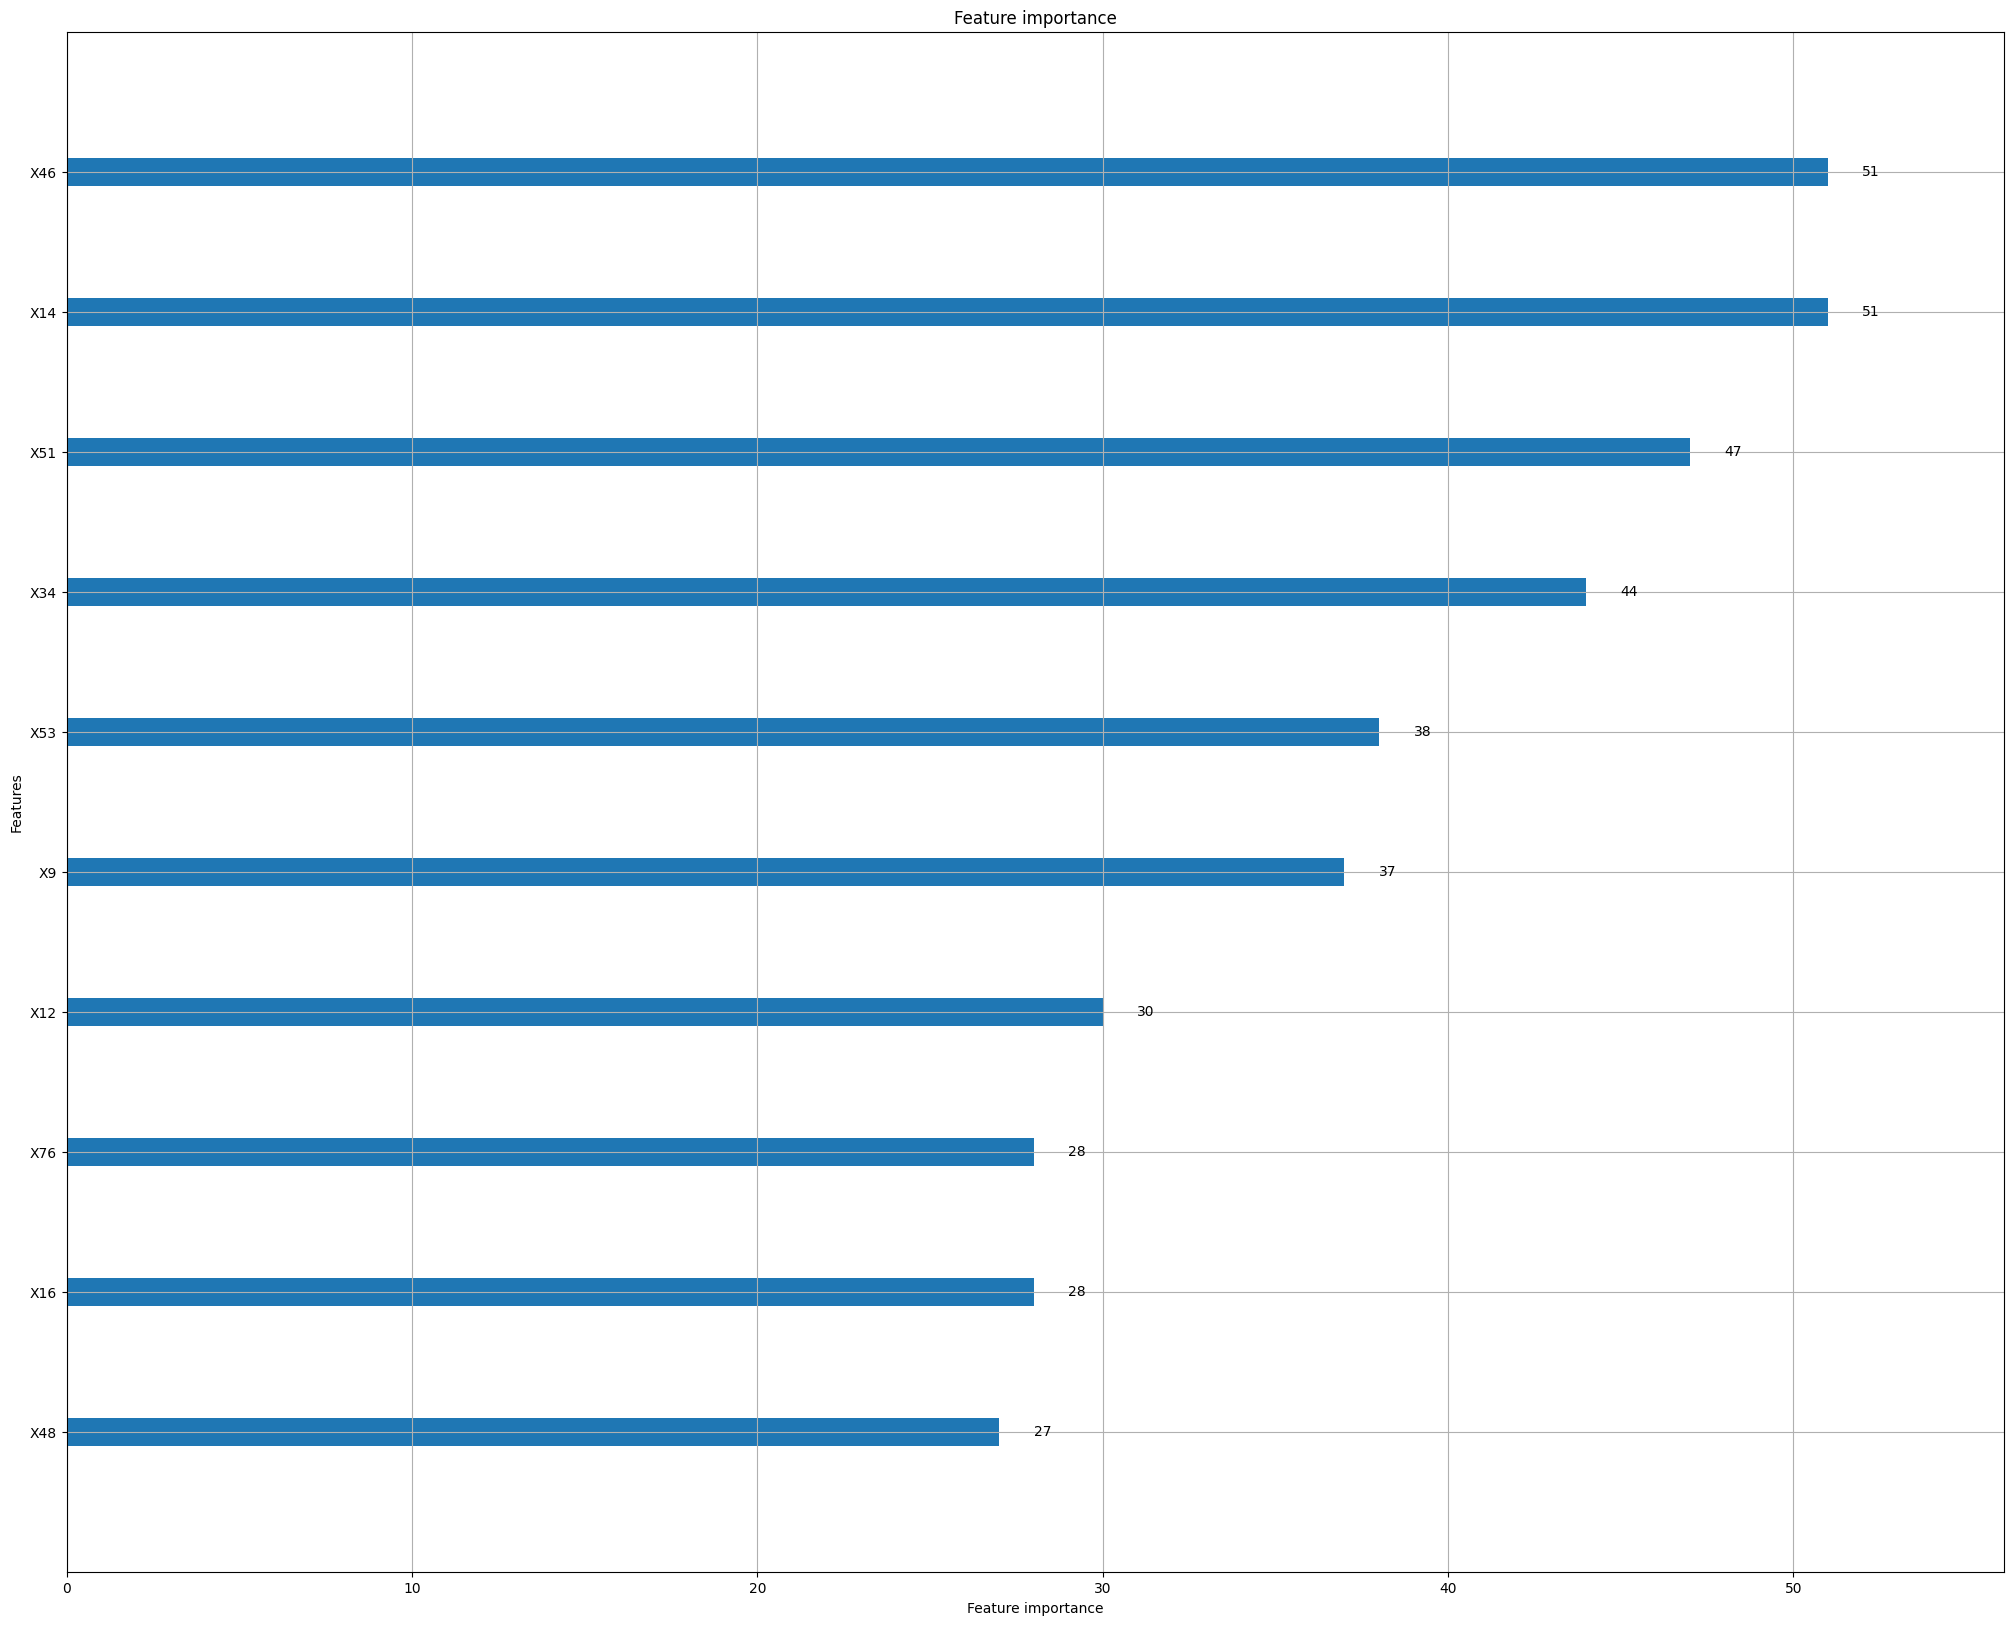

In [ ]:
##% Feature Importance 
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
lgb.plot_importance(lgbm_best,figsize=(25,20),max_num_features = 10)

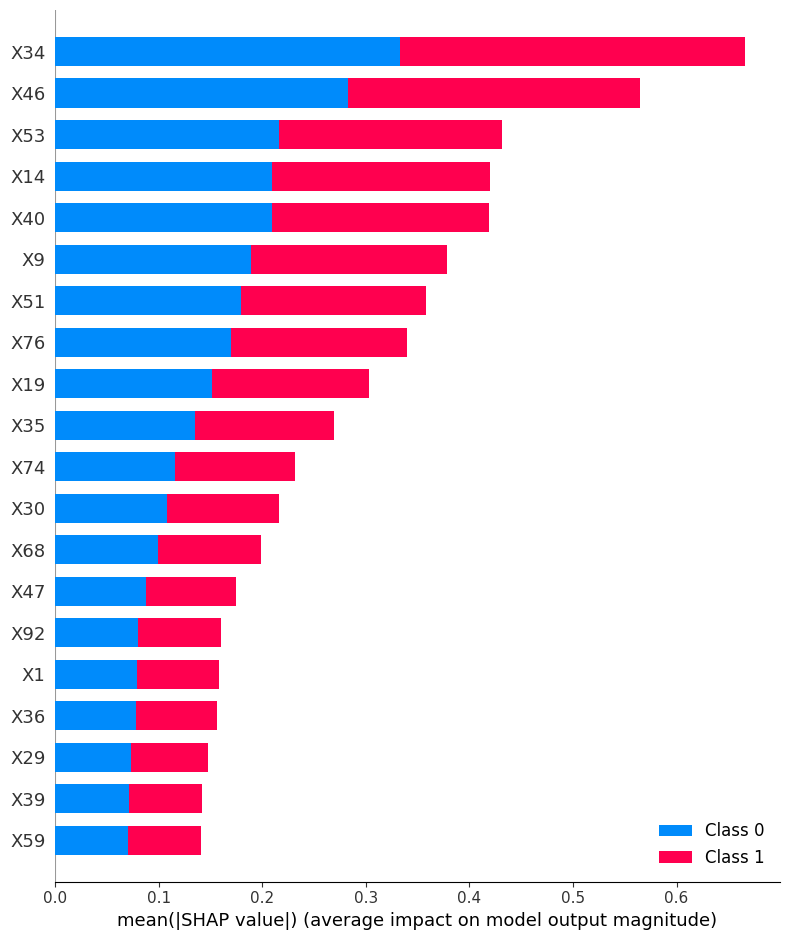

In [ ]:
##% Feature Importance using shap package 
# import shap
shap_values = shap.TreeExplainer(lgbm_best).shap_values(valid_X)
shap.summary_plot(shap_values, valid_X)

In [ ]:
train_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X85,X86,X87,X88,X89,X90,X91,X92,X93,X95
5557,0.446400,0.480975,0.487767,0.607374,0.607497,0.998941,0.797153,0.809093,0.303169,0.781336,...,0,0.762124,0.000600,0.623910,0.607374,0.836488,0.283202,0.026665,0.564474,0.021593
4839,0.510213,0.568415,0.556400,0.607316,0.607295,0.999025,0.797792,0.809607,0.304110,0.781883,...,0,0.816127,0.003316,0.624539,0.607317,0.841214,0.276450,0.026800,0.565199,0.064953
6283,0.555989,0.587604,0.598747,0.610631,0.610631,0.999124,0.797564,0.809446,0.303504,0.781756,...,0,0.826592,0.002296,0.624415,0.610631,0.842167,0.278067,0.026833,0.565350,0.038828
4387,0.377614,0.423953,0.417421,0.596153,0.596521,0.998812,0.796982,0.808924,0.303142,0.781173,...,0,0.729441,0.002758,0.623922,0.596148,0.835453,0.278006,0.026768,0.565045,0.039345
6254,0.451129,0.501799,0.494405,0.607619,0.607619,0.999070,0.797280,0.809187,0.303122,0.781457,...,0,0.778362,0.002582,0.624549,0.607619,0.839168,0.275215,0.026791,0.565158,0.191443


<a id="LightGBM-Model-Peformance "></a>
# LightGBM Model Peformance 

<a id="ROC-Curve"></a>
## ROC Curve

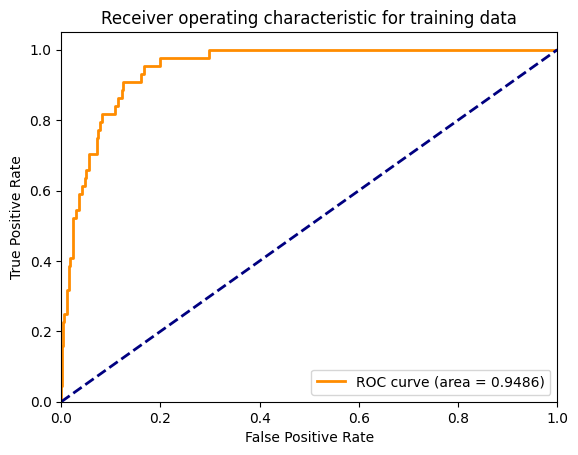

In [ ]:
#  ROC Curve for training/validation data
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
# from sklearn.metrics import roc_curve, auc

y_probas = lgbm_best.predict(valid_X) 

fpr, tpr, _ = roc_curve(valid_y, y_probas)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()

Best Threshold=0.021877, G-Mean=0.893


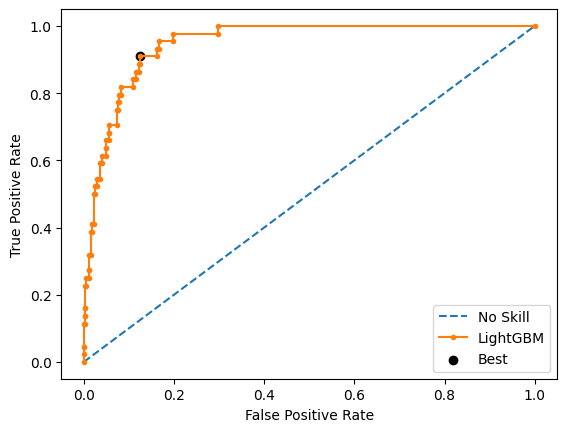

In [ ]:
#  Plot ROC curve and find best threshold to binarize the predictions from LGBM
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
pred_y = lgbm_best.predict(valid_X)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(valid_y, pred_y)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.figure(num=0, figsize=[6.4, 4.8])
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='LightGBM')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import pickle




# save the trained model as a pickle file
with open('lgbm_best.pkl', 'wb') as file:
    pickle.dump(lgbm_best, file)



In [ ]:
# load the saved model from the pickle file
with open('lgbm_best.pkl', 'rb') as file:
    lgbm_best = pickle.load(file)


<a id="Confusion-Matrix"></a>
## Confusion Matrix

In [ ]:
# Great Function found on Kaggle for plotting a Confusion Matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix_kaggle(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# binarize an array based of a threshold 
def binarizeArray(array,threshold = 0.5):
    return [0 if num < threshold else 1 for num in array]

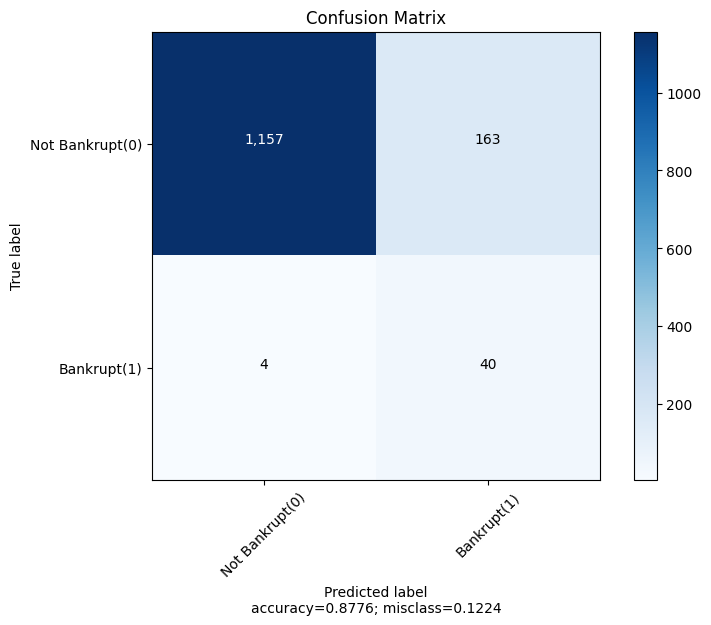

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1320
           1       0.20      0.91      0.32        44

    accuracy                           0.88      1364
   macro avg       0.60      0.89      0.63      1364
weighted avg       0.97      0.88      0.91      1364

Accuracy: 87.76%
Recall: 90.91%


In [ ]:
#  Plot Confusion Matrix with best threshold
pref_y_bin = binarizeArray(pred_y,thresholds[ix])
cm = confusion_matrix(valid_y,pref_y_bin)
plot_confusion_matrix_kaggle(cm =cm, 
                      normalize    = False,
                      target_names = ['Not Bankrupt(0)', 'Bankrupt(1)'],
                      title        = "Confusion Matrix")
print(classification_report(valid_y,pref_y_bin))
print("Accuracy: %.2f%%" % (accuracy_score(valid_y, pref_y_bin)*100.0))
print("Recall: %.2f%%" % ((recall_score(valid_y,pref_y_bin))*100.0))